In [2]:
import pandas as pd

StudentsPerformance = pd.read_csv("C:\python\school-data-science-project\StudentsPerformance.csv")
df = pd.DataFrame(StudentsPerformance,columns=["gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"])

def deg_change(i):
    if i == 'high school' or i == 'some high school':
        return 0
    return 1

def prep_change(i):
    if i == 'none':
        return 0
    return 1

df['parental level of education'] = df['parental level of education'].apply(deg_change)
df['test preparation course'] = df['test preparation course'].apply(prep_change)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1,standard,0,72,72,74
1,female,group C,1,standard,1,69,90,88
2,female,group B,1,standard,0,90,95,93
3,male,group A,1,free/reduced,0,47,57,44
4,male,group C,1,standard,0,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,1,standard,1,88,99,95
996,male,group C,0,free/reduced,0,62,55,55
997,female,group C,0,free/reduced,1,59,71,65
998,female,group D,1,standard,1,68,78,77


# Predikce

[66.62460802]


c:\Users\lleos\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math score   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     407.8
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          6.64e-191
Time:                        10:01:42   Log-Likelihood:                -2862.6
No. Observations:                 800   AIC:                             5735.
Df Residuals:                     795   BIC:                             5759.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           7.5383      1.511      4.988      0.000       4.572      10.505
reading score                   0.5825      0.073      7.962      0.000       0.439       0.726
writing score                   0.2750      0.072      3.812      0.000       0.133       0.417
parental level of education     0.1715      0.657      0.261      0.794      -1.118       1.461
test preparation course        -1.3839      0.685     -2.020      0.044      -2.729      -0.039
==============================================================================
Omnibus:                       10.461   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                6.650
Skew:                           0.024   Prob(JB):                       0.0360
Kurtosis:                       2.556   Cond. No.                         491.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

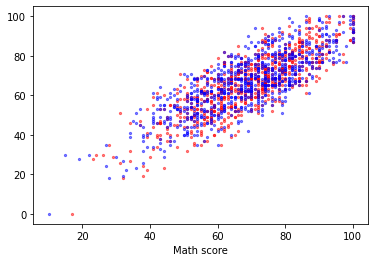

In [3]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")


TEST_SIZE = 0.2
data_train = df.sample(frac=(1-TEST_SIZE),random_state=0)
data_test = df.drop(data_train.index)


X = data_train[['reading score','writing score','parental level of education','test preparation course']]
Y = data_train['math score']


regr = linear_model.LinearRegression()
regr.fit(X, Y)
print(regr.predict([[75,56,0,0]]))


plt.scatter(data_train['reading score'],Y,color="red",s=5,alpha=0.5,marker="o")
plt.scatter(data_train['writing score'],Y,color="blue",s=5,alpha=0.5,marker="o")
plt.xlabel("Math score")


X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
model.summary()


# Kurz na přípravu nevychází, predikce se s účastí spíše zhoršuje -> lidé s horšími výsledky chodí na kurzy
# Pokud je P > |t| nízký, znamená to, že lineární funkce je dobře kopíruje -> je to přesný (nemá to extrémní hodnoty co by bylo třeba odřezávat)
# P > |t| pod 0.05 je signifikantní

# Accuracy

In [44]:
import warnings
warnings.filterwarnings("ignore")


SUCCESS_PERC = 33

data_test['passed_real'] = data_test['math score'].apply(lambda x: x >= SUCCESS_PERC)
data_test['passed_pred'] = data_test.apply(lambda x: regr.predict(x.values[[6, 7, 2, 4]].reshape(1,-1)) >= SUCCESS_PERC, axis=1)

data_train['passed_real'] = data_train['math score'].apply(lambda x: x >= SUCCESS_PERC)
data_train['passed_pred'] = data_train.apply(lambda x: regr.predict(x.values[[6, 7, 2, 4]].reshape(1,-1)) >= SUCCESS_PERC, axis=1)


accurate = data_test[data_test['passed_pred'] == data_test['passed_real']].shape[0]
accurate_train = data_train[data_train['passed_pred'] == data_train['passed_real']].shape[0]
count_train_row = data_train.shape[0]
count_test_row = data_test.shape[0]


print(f"Testovací úspěšně: {accurate}\nTrénovací úspěšně: {accurate_train}")
print(f"-------------------------------")
print(f"Testovací úspěšnost: {accurate/count_test_row}\nTrénovací úspěšnost: {accurate_train/count_train_row}")

Testovací úspěšně: 196
Trénovací úspěšně: 789
-------------------------------
Testovací úspěšnost: 0.98
Trénovací úspěšnost: 0.98625
